In [11]:
from graph import *
import ipywidgets as widgets
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from IPython.display import HTML
from IPython.display import display
from PIL import Image
from matplotlib import lines

In [12]:
france_map = UndirectedGraph(dict(
    Paris=dict(Lyon=465, Marseille=775, Lille=204, Bordeaux=584, Nantes=343, Strasbourg=397),
    Lyon=dict(Paris=465, Marseille=314, Lille=660, Bordeaux=556, Nantes=639, Strasbourg=520),
    Marseille=dict(Paris=775, Lyon=314, Lille=1005, Bordeaux=774, Nantes=1115, Strasbourg=827),
    Lille=dict(Paris=204, Lyon=660, Marseille=1005, Bordeaux=1007, Nantes=586, Strasbourg=405),
    Bordeaux=dict(Paris=584, Lyon=556, Marseille=774, Lille=1007, Nantes=347, Strasbourg=875),
    Nantes=dict(Paris=343, Lyon=639, Marseille=1115, Lille=586, Bordeaux=347, Strasbourg=955),
    Strasbourg=dict(Paris=397, Lyon=520, Marseille=827, Lille=405, Bordeaux=875, Nantes=955)
))

france_map.locations = dict(
    Paris=(2.3522, 48.8566), Lyon=(4.85, 45.75), Marseille=(5.3698, 43.2965),
    Lille=(3.0573, 50.6292), Bordeaux=(-0.5792, 44.8378), Nantes=(-1.5536, 47.2184), Strasbourg=(7.7521, 48.5734)
)

In [13]:
# create a dictionary that stores data (consumption and production) for each city

france_map.data = dict(
    Paris=dict(consumption=0, production=1),
    Lyon=dict(consumption=0, production=2),
    Marseille=dict(consumption=9, production=3),
    Lille=dict(consumption=0, production=4),
    Bordeaux=dict(consumption=7, production=5),
    Nantes=dict(consumption=0, production=6),
    Strasbourg=dict(consumption=0, production=7)
)


In [14]:
# node colors, node positions and node label positions

# node color is green if production > consumption, red if consumption > production, white if consumption = production, grey if no data
node_colors = {k: 'green' if v['production'] > v['consumption'] else 'red' if v['production'] < v['consumption'] else 'white' if v['production'] == v['consumption'] else 'grey' for k, v in france_map.data.items()}
node_positions = france_map.locations
node_label_pos = { k:[v[0],v[1]-0.2]  for k,v in france_map.locations.items() }
node_data_pos = { k:[v[0],v[1]-0.4]  for k,v in france_map.locations.items() }
edge_weights = {(k, k2) : v2 for k, v in france_map.graph_dict.items() for k2, v2 in v.items()}

france_graph_data = {  'graph_dict' : france_map.graph_dict,
                        'node_colors': node_colors,
                        'node_positions': node_positions,
                        'node_label_positions': node_label_pos,
                        'node_data_positions': node_data_pos,
                         'edge_weights': edge_weights,
                         'node_data': france_map.data
                     }

Drawing french contours


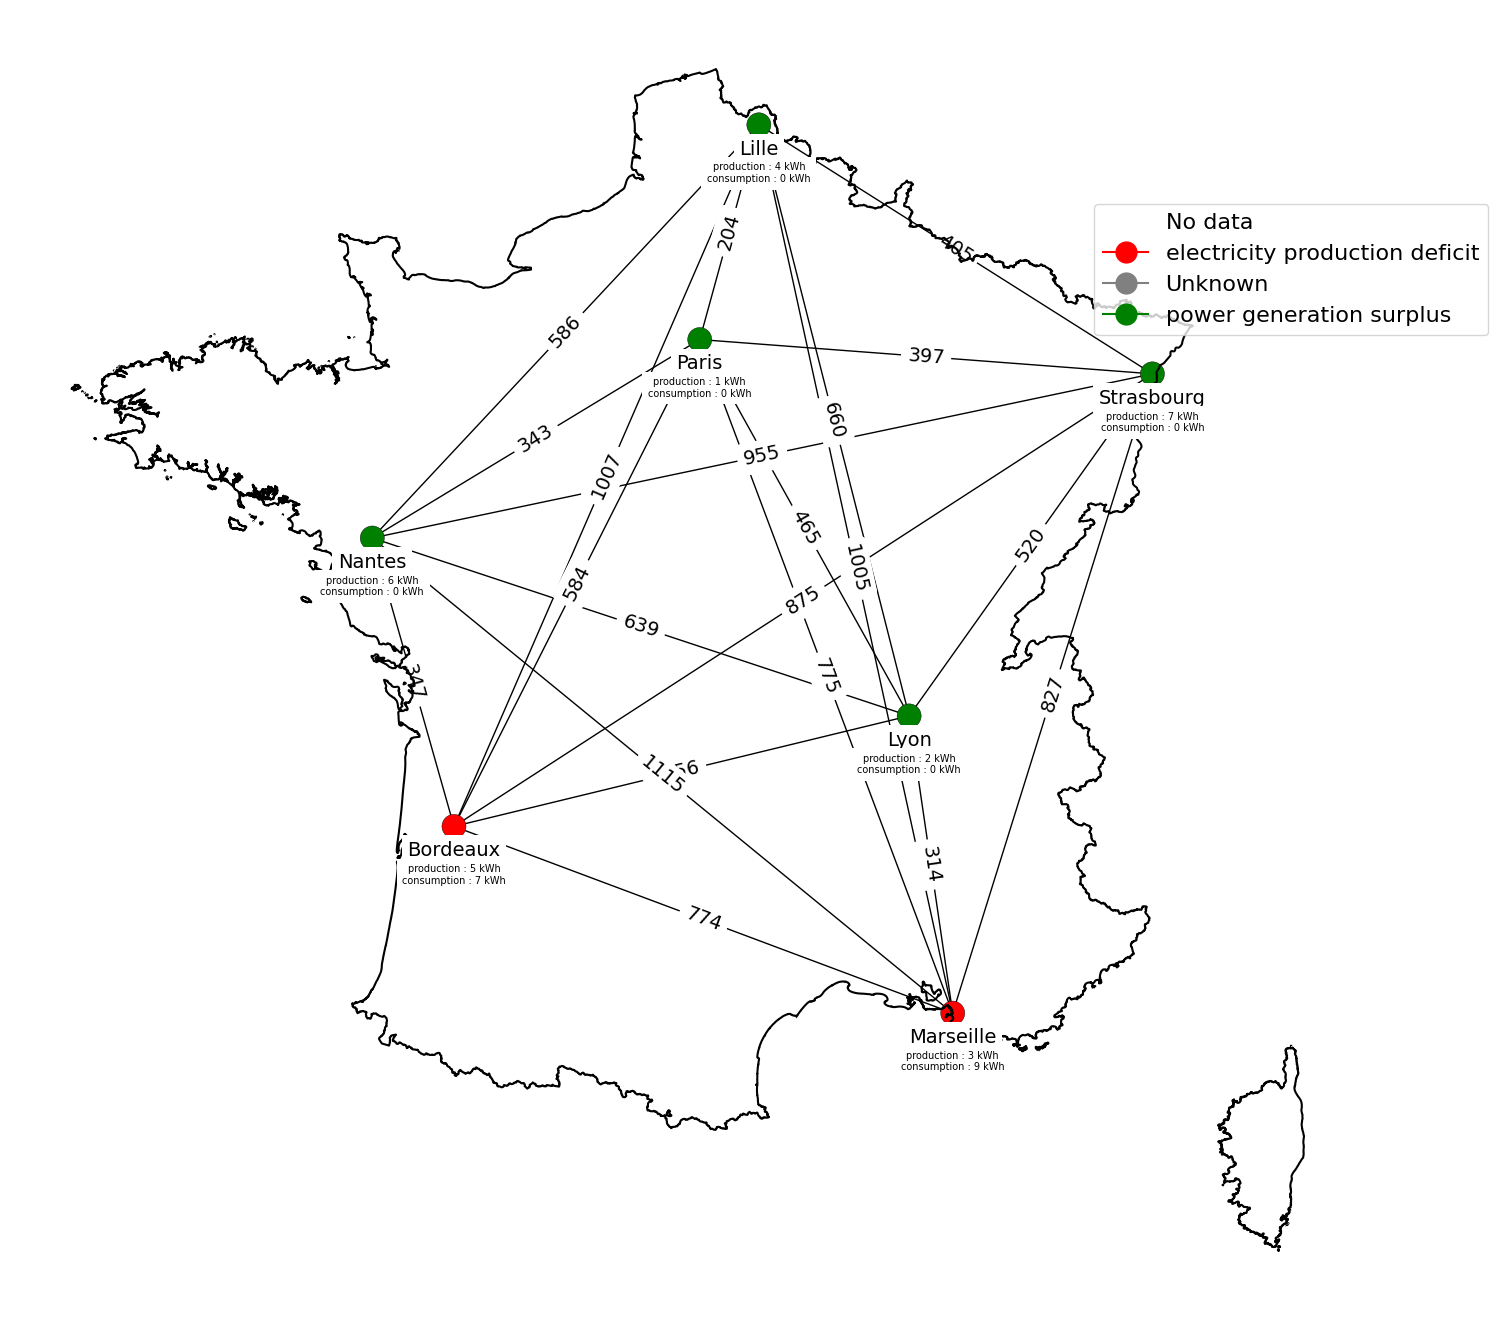

In [15]:
show_map(france_graph_data)